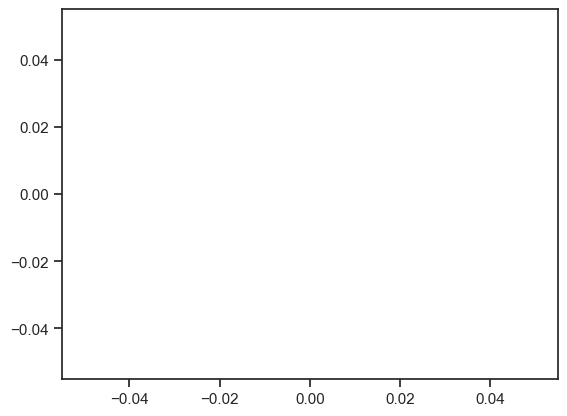

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot()
plt.show()

In [21]:
flights = sns.load_dataset("flights")
# flights.head(5)
# flights.info
# flights.isnull().sum()
flights.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


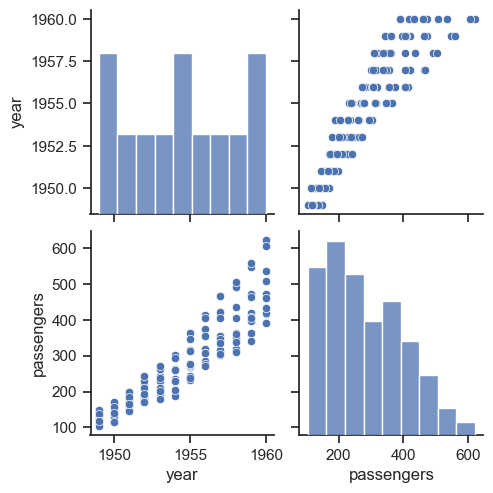

In [22]:
#testing pairplot
sns.pairplot(flights)

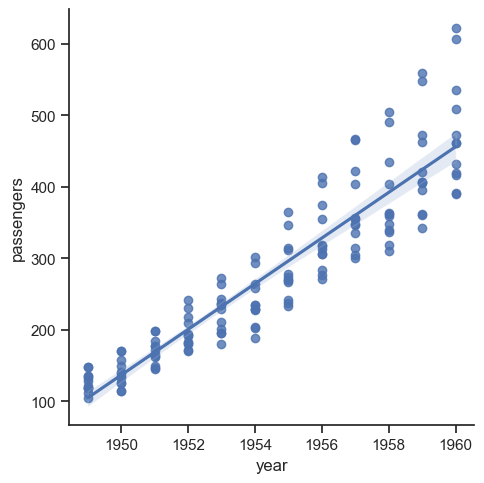

In [23]:
#testing implot
sns.set_theme(style='ticks')
sns.lmplot(data=flights,x="year",y="passengers")

In [39]:
titanic = sns.load_dataset("titanic")
# titanic.head(5)
# titanic.dtypes
# # convert column to float
# titanic['sex'] = titanic['sex'].astype(float)
# titanic.dtypes
null_rows = titanic['sex'].isna().sum()
null_rows

np.int64(0)

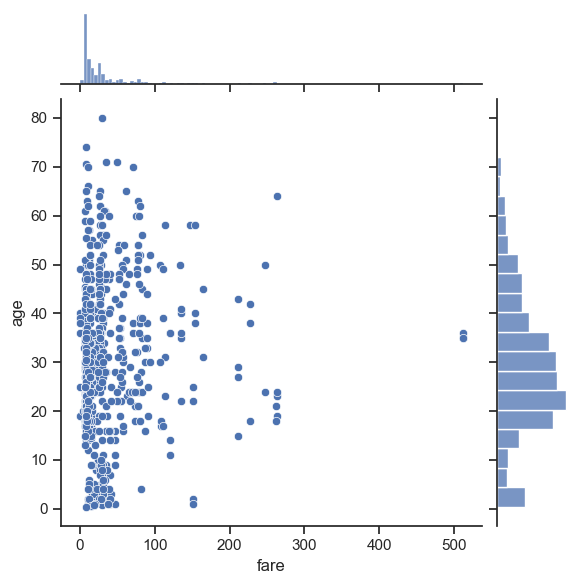

In [25]:
sns.jointplot(x='fare',y='age',data=titanic)

/var/folders/ms/kffv8scn23l62n_5h2kgw9sw0000gn/T/ipykernel_95578/616207242.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class',y='age',data=titanic,palette='rainbow')


<Axes: xlabel='class', ylabel='age'>

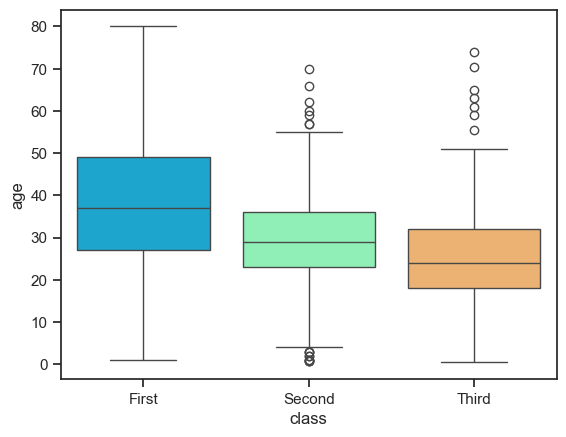

In [26]:
sns.boxplot(x='class',y='age',data=titanic,palette='rainbow')

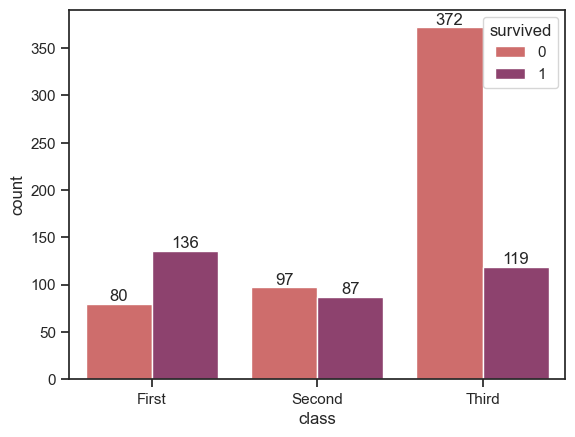

In [27]:
#countplot with values in plot
ax = sns.countplot(x='class',data=titanic, hue='survived',palette='flare')
for container in ax.containers:
    ax.bar_label(container)

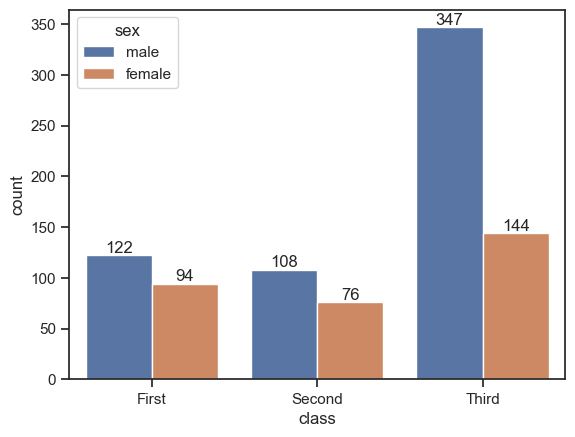

In [28]:
#countplot with values in plot
ax = sns.countplot(x='class',data=titanic, hue='sex')
for container in ax.containers:
    ax.bar_label(container)

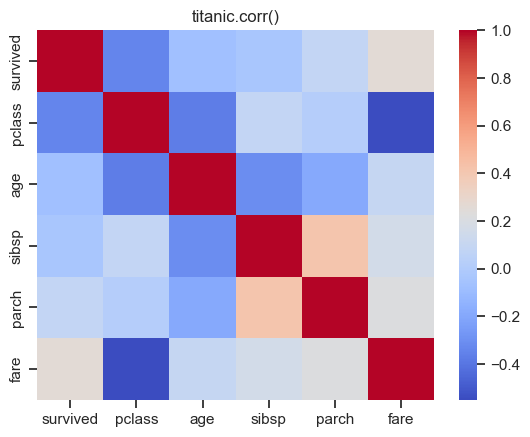

In [42]:
# Select only numeric columns
numeric_data = titanic.select_dtypes(include=['number'])

# Generate the correlation heatmap
sns.heatmap(numeric_data.corr(), cmap='coolwarm')
plt.title('titanic.corr()')
plt.show()